In [1]:
#Import the necessary libraries.
import numpy as np
import pandas as pd
from sklearn import metrics , model_selection
import matplotlib.pyplot as plt
from sklearn import metrics , model_selection
## Import the Classifier.
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
cars_data = pd.read_csv("../input/car-evaluation-datacset/car.csv")
cars_data=cars_data[[
    "buying",
    "maint",
    "doors",
    "persons",
    "lug_boot",
    "safety",
    "class"
]].dropna(axis=0, how='any')
cars_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
#The target variable is marked as class in the dataframe. 
#The values are present in string format.We can convert the string nominal values into numerics values using factorize method of the pandas library.

cars_data['class'],class_names = pd.factorize(cars_data['class'])
cars_data['buying'],_ = pd.factorize(cars_data['buying'])
cars_data['maint'],_ = pd.factorize(cars_data['maint'])
cars_data['doors'],_ = pd.factorize(cars_data['doors'])
cars_data['persons'],_ = pd.factorize(cars_data['persons'])
cars_data['lug_boot'],_ = pd.factorize(cars_data['lug_boot'])
cars_data['safety'],_ = pd.factorize(cars_data['safety'])
cars_data.head()
#print(class_names)
#print(cars_data['class'].unique())

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [4]:
#Select the feature and target variable
#X = cars_data.iloc[:,:-1]
#y = cars_data.iloc[:,-1]

X = cars_data[cars_data.columns[: -1]]
y = cars_data['class']


#To split data (e.g. test=200)
#X_train200, X_test200, y_train200, y_test200 = model_selection.train_test_split(X, y, test_size=0.12)

#To split data in order (e.g. First 1589 records Train= 1589 Test=139)
train_pct_index = int(0.92 * len(X))
X_train, X_test200 = X[:train_pct_index], X[train_pct_index:]
y_train, y_test200 = y[:train_pct_index], y[train_pct_index:]

#To split data in order (e.g. First 1261 records)
#train_pct_index = int(0.73 * len(X))
#X_train, X_test = X[:train_pct_index], X[train_pct_index:]
#y_train, y_test = y[:train_pct_index], y[train_pct_index:]

#To split data in order (e.g. First 760 records)
#train_pct_index = int(0.44 * len(X))
#X_train, X_test = X[:train_pct_index], X[train_pct_index:]
#y_train, y_test = y[:train_pct_index], y[train_pct_index:]

#To split data in order (e.g. First 501 records)
#train_pct_index = int(0.29 * len(X))
#X_train, X_test = X[:train_pct_index], X[train_pct_index:]
#y_train, y_test = y[:train_pct_index], y[train_pct_index:]



In [5]:
#Training / model fitting
model = GaussianNB()
## Fit the model on the training data.
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [6]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test200)
print("Accuracy:",metrics.accuracy_score(y_test200, y_pred))
count_misclassified = (y_test200 != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Accuracy: 0.6402877697841727
Misclassified samples: 50


In [7]:
print(metrics.classification_report(y_test200, y_pred))
confusion_mc = pd.DataFrame(
    confusion_matrix(y_test200, y_pred),
    columns=['unacc', 'acc', 'vgood',  'good'],
    index=['unacc', 'acc', 'vgood',  'good']
)
print(confusion_mc)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        78
           1       0.14      0.08      0.11        12
           2       0.40      1.00      0.58        19
           3       0.53      0.27      0.36        30

    accuracy                           0.64       139
   macro avg       0.49      0.53      0.47       139
weighted avg       0.67      0.64      0.63       139

       unacc  acc  vgood  good
unacc     61    0     16     1
acc        5    1      0     6
vgood      0    0     19     0
good       4    6     12     8


In [8]:
# To avoid Zero Devision Warning
#from sklearn.metrics import f1_score
#metrics.f1_score(y_test, y_pred,average='weighted', labels=np.unique(y_pred))

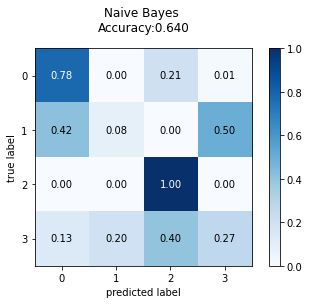

<Figure size 720x576 with 0 Axes>

In [9]:
#class_names = ['unacc', 'acc', 'vgood',  'good']
confusion_mc = confusion_matrix(y_test200, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=confusion_mc,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True)
plt.title('Naive Bayes \nAccuracy:{0:.3f}'.format(metrics.accuracy_score(y_test200, y_pred)))
plt.figure(figsize=(10,8))
plt.show()

In [10]:
confusion_mc = confusion_mc.astype('float') / confusion_mc.sum(axis=1)[:, np.newaxis]
print("Per Class Classification Matrix:",confusion_mc.diagonal())

Per Class Classification Matrix: [0.78205128 0.08333333 1.         0.26666667]


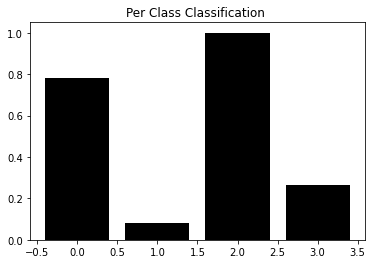

In [11]:
plt.bar(range(4),confusion_mc.diagonal(),color = 'black', align = 'center')
plt.title("Per Class Classification ") 
plt.style.use('ggplot')
plt.show()